In [1]:
# Step 1
# Load the data
import pandas as pd
# , numpy, , sklearn

df = pd.read_csv('clean-data.csv')

In [2]:
# Step 2
# Print the data
data_size = df.shape[0]
print("Size: " + str(data_size))
df.head(5)

Size: 2672


,id,screen_name,location,description,url,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,name,bot
0,8.160000e+17,"""HoustonPokeMap""","""Houston, TX""","""Rare and strong PokŽmon in Houston, TX. See m...","""https://t.co/dnWuDbFRkt""",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\n ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,"""Houston PokŽ Alert""",1
1,4.843621e+09,kernyeahx,"Templeville town, MD, USA",From late 2014 Socium Marketplace will make sh...,NaN,1,349,0,2/1/2016 7:37,38,False,31,en,NaN,True,False,Keri Nelson,1
2,4.303727e+09,mattlieberisbot,NaN,"Inspired by the smart, funny folks at @replyal...",https://t.co/P1e1o0m4KC,1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,Matt Lieber Is Bot,1
3,3.063139e+09,sc_papers,NaN,NaN,NaN,33,0,8,2/25/2015 20:11,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,single cell papers,1
4,2.955142e+09,lucarivera16,"Dublin, United States",Inspiring cooks everywhere since 1956.,NaN,11,745,0,1/1/2015 17:44,146,False,185,en,NaN,False,False,lucarivera16,1


In [3]:
# Step 3
# Drop empty data
to_drop = []
for i, count in enumerate(df.isnull().sum()):
    if (float(count) / float(data_size) > 0.35):
        to_drop.append(df.columns[i])
        
df = df.drop(columns=to_drop)
df.head()

,id,screen_name,description,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,name,bot
0,8.160000e+17,"""HoustonPokeMap""","""Rare and strong PokŽmon in Houston, TX. See m...",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\n ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,"""Houston PokŽ Alert""",1
1,4.843621e+09,kernyeahx,From late 2014 Socium Marketplace will make sh...,1,349,0,2/1/2016 7:37,38,False,31,en,NaN,True,False,Keri Nelson,1
2,4.303727e+09,mattlieberisbot,"Inspired by the smart, funny folks at @replyal...",1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,Matt Lieber Is Bot,1
3,3.063139e+09,sc_papers,NaN,33,0,8,2/25/2015 20:11,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,single cell papers,1
4,2.955142e+09,lucarivera16,Inspiring cooks everywhere since 1956.,11,745,0,1/1/2015 17:44,146,False,185,en,NaN,False,False,lucarivera16,1


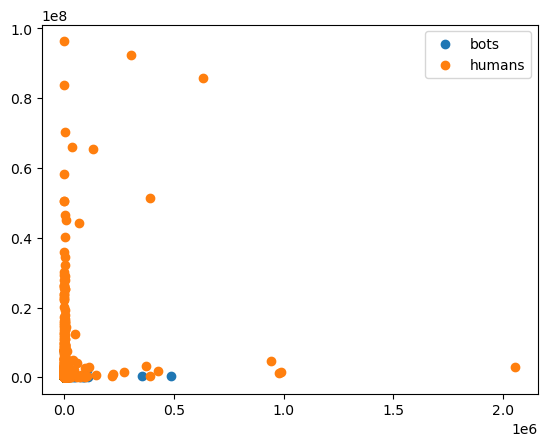

In [4]:
import matplotlib.pyplot as plt

df_bot = df[df.bot == 1]
df_hum = df[df.bot != 1]
plt.scatter(df_bot.friends_count, df_bot.followers_count, label="bots")
plt.scatter(df_hum.friends_count, df_hum.followers_count, label="humans")
# plt.set_xlabel("friends", fontsize=15)
# plt.set_ylabel("followers", fontsize=15)
plt.legend()
plt.show()

# plt.set(xlim=(0, 8), ylim=(0, 8))